# k-nearest neighbors (KNN)

In [1]:
from sklearn.datasets import make_blobs 
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

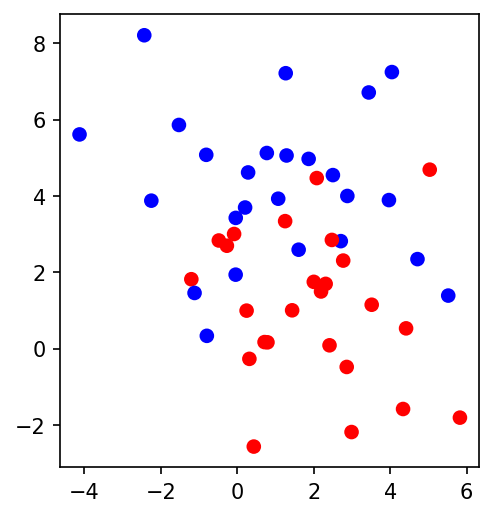

In [2]:
X, y = make_blobs(centers=2, cluster_std=2, random_state=0, n_samples=50)
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['figure.dpi'] = "150"
plt.figure()
plt.gca().set_aspect("equal")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.savefig("images/knn_boundary_dataset.png", bbox_inches='tight')

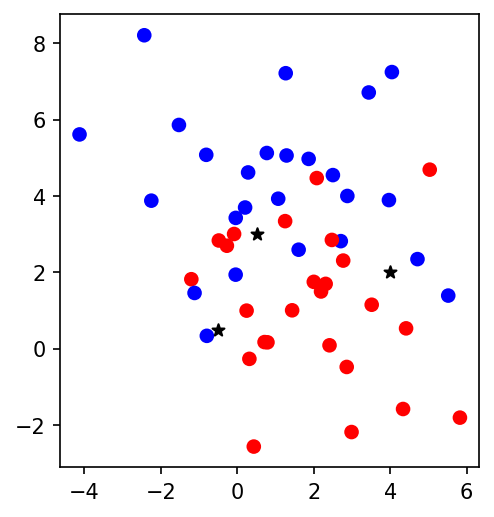

In [3]:
X_test = np.array([[0.5, 3], [4, 2], [-.5, .5]])

plt.figure()
plt.gca().set_aspect("equal")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(X_test[:, 0], X_test[:, 1], c='k', marker="*")
plt.savefig("images/knn_boundary_test_points.png", bbox_inches='tight')

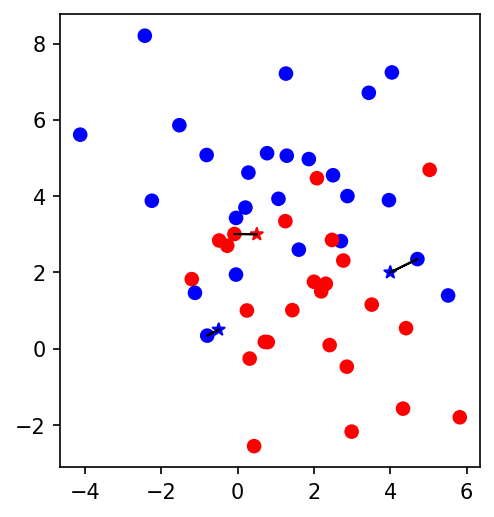

In [4]:
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier

def plot_n_neighbors(X, y, n_neighbors=1):
    X_test = np.array([[0.5, 3], [4, 2], [-.5, .5]])
    dist = euclidean_distances(X, X_test)
    closest = np.argsort(dist, axis=0)

    plt.figure()
    plt.gca().set_aspect("equal")
    for x, neighbors in zip(X_test, closest.T):
        for neighbor in neighbors[:n_neighbors]:
            plt.arrow(x[0], x[1], X[neighbor, 0] - x[0],
                    X[neighbor, 1] - x[1], head_width=0, fc='k', ec='k')

    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    test_points = plt.scatter(X_test[:, 0], X_test[:, 1], c=clf.predict(X_test), marker="*")
    training_points = plt.scatter(X[:, 0], X[:, 1], c=y)    
plot_n_neighbors(X, y)
plt.savefig("images/knn_boundary_k1.png", bbox_inches='tight')

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print(f"accuracy on training set: {knn.score(X_train, y_train):.2f}")
print(f"accuracy on test set: {knn.score(X_test, y_test):.2f}")

accuracy on training set: 1.00
accuracy on test set: 0.77


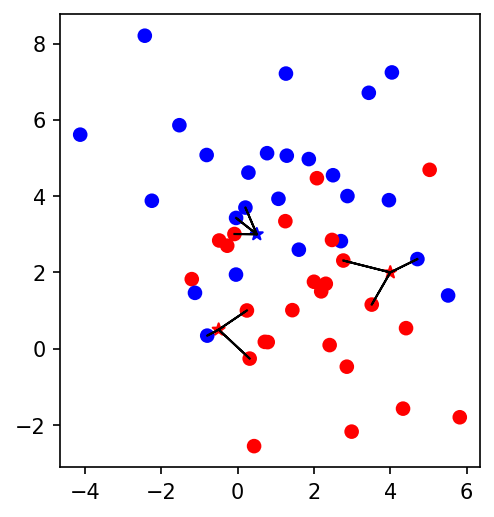

In [6]:
plot_n_neighbors(X, y, n_neighbors=3)
plt.savefig("images/knn_boundary_k3.png", bbox_inches='tight')

In [7]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(f"accuracy on training set: {knn.score(X_train, y_train):.2f}")
print(f"accuracy on test set: {knn.score(X_test, y_test):.2f}")

accuracy on training set: 0.81
accuracy on test set: 0.85


### Another Application: Classifying Iris Species
![sepal_petal](images/iris_petal_sepal.png)

#### Meet the Data

In [8]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [9]:
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [11]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [12]:
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [13]:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [14]:
print("Type of data:", type(iris_dataset['data']))

Type of data: <class 'numpy.ndarray'>


In [15]:
print("Shape of data:", iris_dataset['data'].shape)

Shape of data: (150, 4)


In [16]:
print("First five rows of data:\n", iris_dataset['data'][:5])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [17]:
print("Type of target:", type(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>


In [18]:
print("Shape of target:", iris_dataset['target'].shape)

Shape of target: (150,)


In [19]:
print("Target:\n", iris_dataset['target'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Measuring Success: Training and Testing Data

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [21]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [22]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


#### First Things First: Look at Your Data

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb56437cbd0>,
      dtype=object)

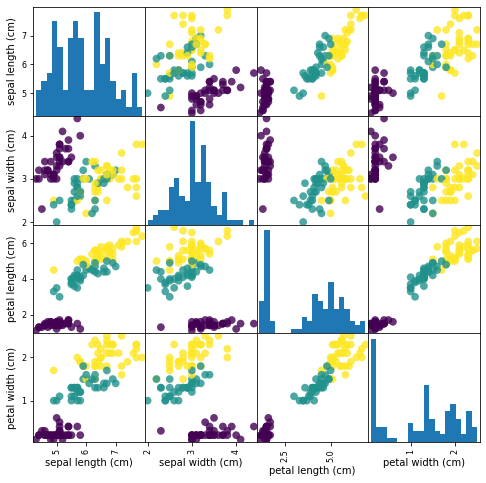

In [24]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
plt.rcParams['image.cmap'] = "viridis"
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(8, 8),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)

#### Building Your First Model: k-Nearest Neighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

#### Making Predictions

In [27]:
import numpy as np

In [28]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [29]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])

Prediction: [0]
Predicted target name: ['setosa']


#### Evaluating the Model

In [30]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [31]:
print(y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


In [32]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [33]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


### Summary and Outlook

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Training set score: 1.00
Test set score: 0.97
